In [2]:
print("Problem statement: For the VelocityX app, there are two streams of revenue being measured: Merchandise Purchases and Sponsorship Interactions.")
print("The idea behind this prompt is to find which variables, or features of the app, have the strongest relationship with the measure of Merchandise Purchase and Sponsorship Interactions, respectively.")

Problem statement: For the VelocityX app, there are two streams of revenue being measured: Merchandise Purchases and Sponsorship Interactions.
The idea behind this prompt is to find which variables, or features of the app, have the strongest relationship with the measure of Merchandise Purchase and Sponsorship Interactions, respectively.


In [4]:
import numpy as np
import pandas as pd
#Import numpy and panda libraries

In [5]:
data = pd.read_csv(r'C:\Users\nasod\Downloads\2025-VeloCityX-Expanded-Fan-Engagement-Data.csv')
#Set filepath

In [6]:
data

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8
...,...,...,...,...,...,...,...
95,U096,8,86,6,14,98,22
96,U097,3,82,3,1,159,24
97,U098,1,91,1,9,92,34
98,U099,8,93,0,1,160,40


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
#Import machine learning libraries

In [11]:
import matplotlib.pyplot as plt
#Import plotting library

In [12]:
from scipy import stats
#Import stats library to find outliers

In [13]:
# Function to find outliers using the Z-score method
def find_outliers_zscore(data):
    z_scores = stats.zscore(data)
    return data[abs(z_scores) > 3]

# Loop through each numerical category
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    outliers = find_outliers_zscore(df[column])
    print(f"Outliers in {column}:")
    print(outliers)

#NO OUTLIERS FOUND USING THIS FUNCTION SO CLEANING DATA WON'T BE NECESSARY

Outliers in Fan Challenges Completed:
Series([], Name: Fan Challenges Completed, dtype: int64)
Outliers in Predictive Accuracy (%):
Series([], Name: Predictive Accuracy (%), dtype: int64)
Outliers in Virtual Merchandise Purchases:
Series([], Name: Virtual Merchandise Purchases, dtype: int64)
Outliers in Sponsorship Interactions (Ad Clicks):
Series([], Name: Sponsorship Interactions (Ad Clicks), dtype: int64)
Outliers in Time on Live 360 (mins):
Series([], Name: Time on Live 360 (mins), dtype: int64)
Outliers in Real-Time Chat Activity (Messages Sent):
Series([], Name: Real-Time Chat Activity (Messages Sent), dtype: int64)


In [8]:
df = pd.DataFrame(data)

In [25]:
x = df[['Fan Challenges Completed']]
y = df[['Virtual Merchandise Purchases']]
#Set variables to measure Merchandise Purchases

In [27]:
# Train data and print predictions
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)
mse2 = mean_squared_error(y_train,train_preds)
r2a = r2_score(y_train,train_preds)
print(f"Mean Squared Error (MSE): {mse2}")
print(f"R-squared: {r2a}")

Mean Squared Error (MSE): 4.102643193946927
R-squared: 0.026042641000766698


In [26]:
#Test data and print predictions
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")
#Analyse MSE and R^2 values to check for overfitting or underfitting

Mean Squared Error (MSE): 4.171784654861069
R-squared: 0.004347337741988366


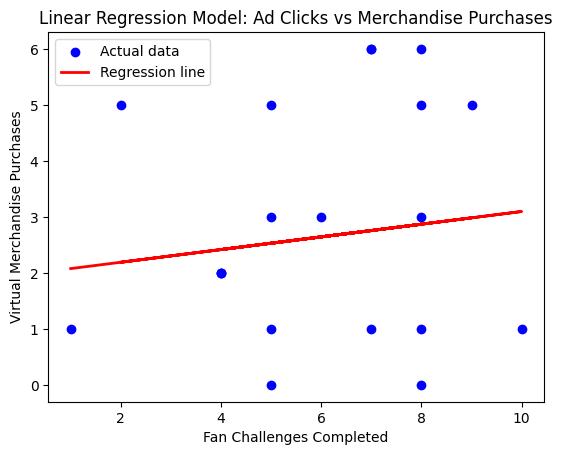

Intercept: [1.96399591]
Slope: [0.11327582]


In [28]:
plt.scatter(x_test, y_test, color='blue', label='Actual data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Virtual Merchandise Purchases')
plt.legend()
plt.title('Linear Regression Model: Ad Clicks vs Merchandise Purchases')
plt.show()
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
#Print merchandise purchases linear regression graph and trendline values

In [29]:
x2 = df[['Real-Time Chat Activity (Messages Sent)']]
y2 = df[['Sponsorship Interactions (Ad Clicks)']]
#Set variables for Sponsorship linear regression model

In [30]:
#Test data and print MSE and R^2 values
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x2_train,y2_train)
y2_pred = model.predict(x2_test)
mse = mean_squared_error(y2_test,y2_pred)
r2 = r2_score(y2_test,y2_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 40.58264212616301
R-squared: -0.1516073248059875


In [31]:
# Train data and print predictions
train_preds = model.predict(x2_train)
test_preds = model.predict(x2_test)
mse2 = mean_squared_error(y2_train,train_preds)
r2a = r2_score(y2_train,train_preds)
print(f"Mean Squared Error (MSE): {mse2}")
print(f"R-squared: {r2a}")
#Analyse MSE and R^2 values to check for overfitting or underfitting

Mean Squared Error (MSE): 38.097394014558304
R-squared: 0.0693197993267789


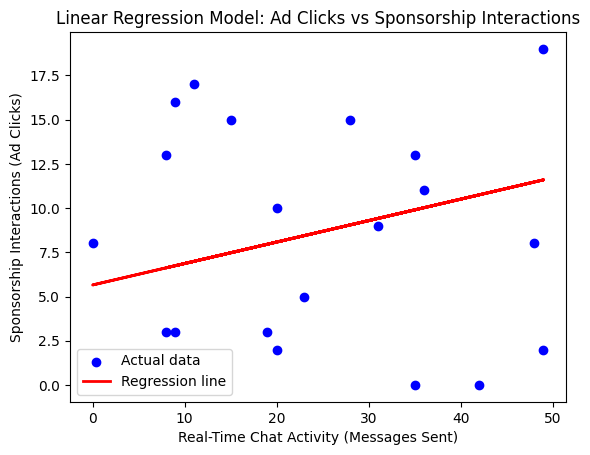

Intercept: [5.65158309]
Slope: [0.12133003]


In [36]:
plt.scatter(x2_test, y2_test, color='blue', label='Actual data')
plt.plot(x2_test, y2_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Real-Time Chat Activity (Messages Sent)')
plt.ylabel('Sponsorship Interactions (Ad Clicks)')
plt.legend()
plt.title('Linear Regression Model: Ad Clicks vs Sponsorship Interactions')
plt.show()
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
#Print sponsorship interactions linear regression graph and trendline values

In [ ]:
#detrend = y_train - model
#plt.figure(figsize=(12, 6))
#plt.plot(x, detrend, label='Detrended Yield', marker='o')
#plt.axhline(0, color='red', linestyle='--')
#plt.title('Detrended Yield Data')
#plt.xlabel('Year')
#plt.ylabel('Detrended Yield (BU / ACRE)')
#plt.legend()
#plt.grid(True)
#plt.show()

#Wanted to plot a detrend model showcasing the diifference between the predicted and actual values
#Was unable to implement due to running out of time

In [42]:
X = np.column_stack((x, y))
#Set up variables for cluster analysis for merchandise purchases

In [43]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [44]:
# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


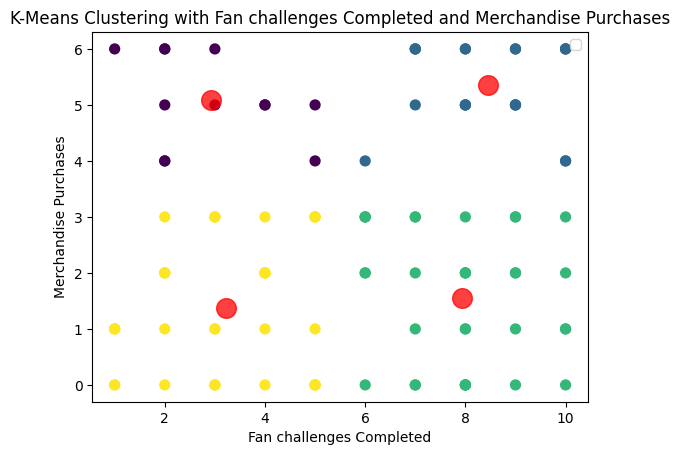

In [45]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering with Fan challenges Completed and Merchandise Purchases')
plt.xlabel('Fan challenges Completed')
plt.ylabel('Merchandise Purchases')
plt.legend()
plt.show()

In [32]:
X2 = np.column_stack((x2, y2))

In [33]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X2)

KMeans(n_clusters=4)

In [34]:
# Get the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


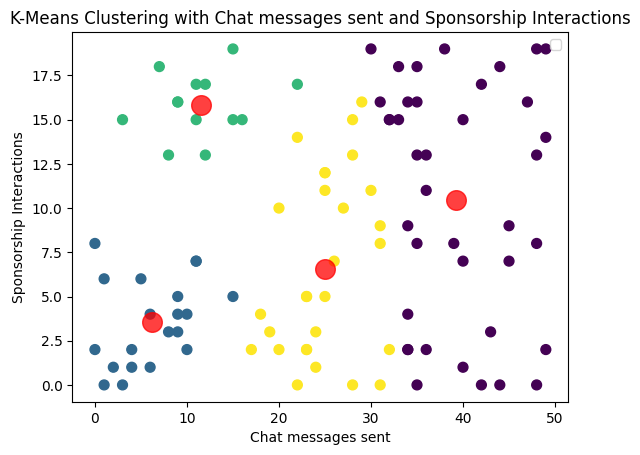

In [40]:
# Plot the clusters
plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering with Chat messages sent and Sponsorship Interactions')
plt.xlabel('Chat messages sent')
plt.ylabel('Sponsorship Interactions')
plt.legend()
plt.show()

In [39]:
print("The variables that showed the strongest positive relationship were chosen in the model and analysis given the slope. Meaning that other variables showed a negative relationship or no relationship at all in accordance with the dependent variable.")
print(" ")
print("Analysis: In conclusion, VelocityX needs to stress the implementation of fan challenges and the forum in order to realize a profit in monetization. A possible solution is implementing daily challenges with rewards so the user can send a certain amount of messages in the forums and complete a set amount of challenges to recieve some kind of incentive to retain user interaction.")

The variables that showed the strongest positive relationship were chosen in the model and analysis given the slope. Meaning that other variables showed a negative relationship or no relationship at all in accordance with the dependent variable.
 
Analysis: In conclusion, VelocityX needs to stress the implementation of fan challenges and the forum in order to realize a profit in monetization. A possible solution is implementing daily challenges with rewards so the user can send a certain amount of messages in the forums and complete a set amount of challenges to recieve some kind of incentive to retain user interaction.
